
# Sentiment Analysis "Reviews of Foods from Amazon"
#.. Recommender System and Topic Modeling



## Importing Data and Libraries

In [1]:
import sys
print(sys.executable)

/Users/abrarsaad/opt/anaconda3/bin/python


In [2]:
#pip install some_package

Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install wordcloud

In [4]:
import pandas as pd 
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
df=pd.read_csv("/Users/abrarsaad/desktop/Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.shape

(568454, 10)

# EDA

####  Dealing With Missing Values

In [7]:
#first,detecting the null values where we found 16 in profileName and 27 in summary
df.isnull().sum() 


Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
#I dealt with null values in ProfileName ,filling with unknown
df['ProfileName'].fillna('unknown',inplace=True)
df['Summary'].fillna('unknown',inplace=True)

In [9]:
df.isnull().sum() 

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [10]:
################pikil shceck ###############################
def load_model(model_file):
    try:
        with open(model_file ,'rb')as reader:
            model=pk.load(reader)
            return model 
    except Exception as e:
        print(e)
        return None 

# Feature Engineering 

In [11]:
def labelfunk(Score):
    if Score >=4:
        return 'Positive'
    elif Score <=2:
        return 'Negative'
    else:
        return 'Netural'
df['Label']=df['Score'].apply(labelfunk)
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,Positive
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Positive
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,Positive
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,Positive
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,Positive


In [12]:
counts = df['Label'].value_counts()
counts

Positive    443777
Negative     82037
Netural      42640
Name: Label, dtype: int64

In [13]:
data=df.sample(10000).copy()

In [14]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
335373,335374,B000CHKHHM,AVQZOFV1QYZPD,Andrew Vice,1,4,1,1338854400,Save yourself some money,Save yourself $10 and make this at home. You c...,Negative
97846,97847,B0001LQKBQ,A2NFI43MR3EFP9,"Diane ""old gray mare""",3,4,5,1259625600,The very best British Tea!,"My husband is addicted to PG Tips, and I have ...",Positive
251915,251916,B00355AKX4,A1Y09QLADQYQJG,"The&#34;older than dirt&#34;Time Traveller ""&...",0,0,5,1343952000,Love 'em!,I'll keep this short:<br /><br />I started eat...,Positive
13052,13053,B000LRH7WG,A12XHJZ9Q1FPV6,George,0,0,5,1341964800,Taste like home made in Greece,My Family used to Lived in South of Greece (At...,Positive
241149,241150,B001UOW7D8,A9LN9JLJ1S9P2,"Rose ""r1gardnr""",16,18,5,1281830400,spinal disks,I take Knox gelatine on the advice of my physi...,Positive
...,...,...,...,...,...,...,...,...,...,...,...
370914,370915,B004G929E6,A3CXV7R3N63KAX,Cassaundra,17,17,5,1330128000,Fast and Fresh,I heard about these cakes first from the ever ...,Positive
560616,560617,B000CQID1K,A2W3JBVCIH012L,rdizzle,2,3,1,1307577600,EXPIRATION DATE 4 MONTHS FROM DATE OF PURCHASE,This item was purchased and shipped out by Ama...,Negative
167059,167060,B006Y02OZO,A3H9AY2ZUEBH18,slnjds,1,1,3,1332288000,Fun but don't expect more than 20 beans.,My son loves the Harry Potter books and movies...,Netural
336721,336722,B005GX8MMO,A23EBUNZO27NJ5,nitewings,1,1,5,1341878400,great coffee,great coffee. having lived in italy for a year...,Positive


## EDA

 This figure shows the most common words in amazon food reviews 

In [15]:
# Downsampling
pd.concat([data[data.Label == 'Positive'],
                        data[data.Label == 'Negative'],
                        data[data.Label == 'Netural']]).reset_index(drop=True)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
335373,335374,B000CHKHHM,AVQZOFV1QYZPD,Andrew Vice,1,4,1,1338854400,Save yourself some money,Save yourself $10 and make this at home. You c...,Negative
97846,97847,B0001LQKBQ,A2NFI43MR3EFP9,"Diane ""old gray mare""",3,4,5,1259625600,The very best British Tea!,"My husband is addicted to PG Tips, and I have ...",Positive
251915,251916,B00355AKX4,A1Y09QLADQYQJG,"The&#34;older than dirt&#34;Time Traveller ""&...",0,0,5,1343952000,Love 'em!,I'll keep this short:<br /><br />I started eat...,Positive
13052,13053,B000LRH7WG,A12XHJZ9Q1FPV6,George,0,0,5,1341964800,Taste like home made in Greece,My Family used to Lived in South of Greece (At...,Positive
241149,241150,B001UOW7D8,A9LN9JLJ1S9P2,"Rose ""r1gardnr""",16,18,5,1281830400,spinal disks,I take Knox gelatine on the advice of my physi...,Positive


In [16]:
positive = data[data.Label=="Positive"]["Text"].values
negative = data[data.Label=="Negative"]["Text"].values
netural  = data[data.Label=="Netural"]["Text"].values

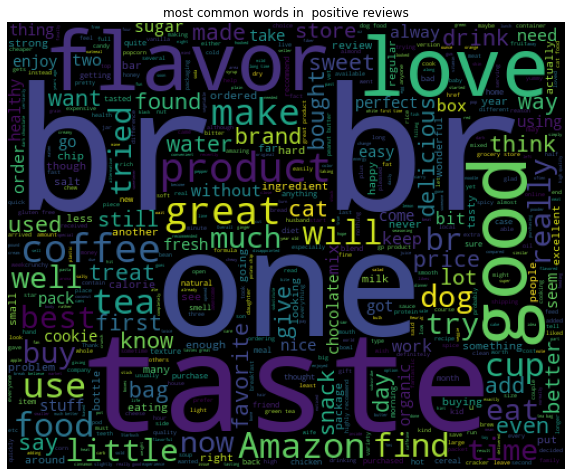

In [17]:
wordcloud = WordCloud(width=500,height=400,max_words=1000).generate(''.join(positive))
plt.figure(figsize=(10,12))
plt.axis('off')
plt.title('most common words in  positive reviews')
plt.imshow(wordcloud)
plt.show()

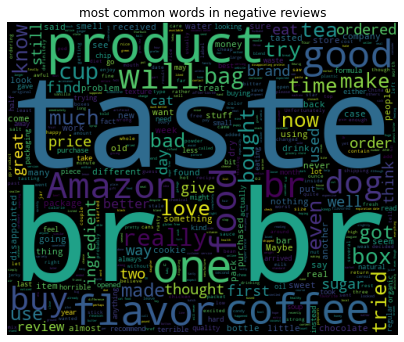

In [18]:
wordcloud = WordCloud(width=500,height=400,max_words=1000).generate(''.join(negative))
plt.figure(figsize=(7,7))
plt.axis('off')
plt.title('most common words in negative reviews')
plt.imshow(wordcloud)
plt.show()

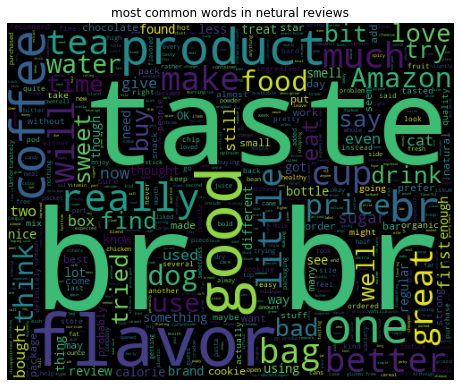

In [19]:
wordcloud = WordCloud(width=500,height=400,max_words=1000).generate(''.join(netural))
plt.figure(figsize=(8,8))
plt.axis('off')
plt.title('most common words in netural reviews')
plt.imshow(wordcloud)
plt.show()

Text(0, 0.5, 'Number of Reviews')

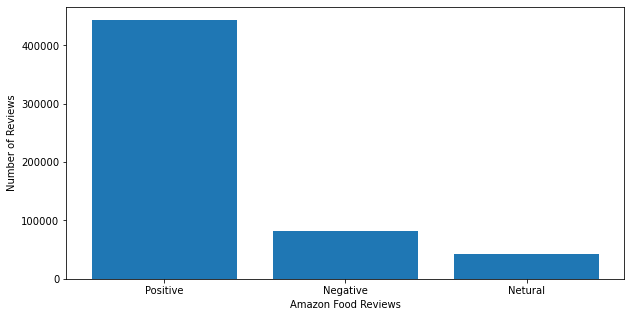

In [20]:
# This plot shows the amount of reviews we have labeled as positive,negative and netural
plt.figure(figsize=(10,5))
plt.bar(df.Label.astype(str).value_counts().index, df.Label.astype(str).value_counts());
plt.xlabel('Amazon Food Reviews')
plt.ylabel('Number of Reviews')

 Class Imbalance..

# pre-processing the Text 

#### Removing unneeded columns

In [21]:
data.drop(columns=['Id','UserId', 'Time','HelpfulnessNumerator','HelpfulnessDenominator'],axis=0,inplace=True)

In [22]:
data

,ProductId,ProfileName,Score,Summary,Text,Label
335373,B000CHKHHM,Andrew Vice,1,Save yourself some money,Save yourself $10 and make this at home. You c...,Negative
97846,B0001LQKBQ,"Diane ""old gray mare""",5,The very best British Tea!,"My husband is addicted to PG Tips, and I have ...",Positive
251915,B00355AKX4,"The&#34;older than dirt&#34;Time Traveller ""&...",5,Love 'em!,I'll keep this short:<br /><br />I started eat...,Positive
13052,B000LRH7WG,George,5,Taste like home made in Greece,My Family used to Lived in South of Greece (At...,Positive
241149,B001UOW7D8,"Rose ""r1gardnr""",5,spinal disks,I take Knox gelatine on the advice of my physi...,Positive
...,...,...,...,...,...,...
370914,B004G929E6,Cassaundra,5,Fast and Fresh,I heard about these cakes first from the ever ...,Positive
560616,B000CQID1K,rdizzle,1,EXPIRATION DATE 4 MONTHS FROM DATE OF PURCHASE,This item was purchased and shipped out by Ama...,Negative
167059,B006Y02OZO,slnjds,3,Fun but don't expect more than 20 beans.,My son loves the Harry Potter books and movies...,Netural
336721,B005GX8MMO,nitewings,5,great coffee,great coffee. having lived in italy for a year...,Positive


In [23]:
data.shape

(10000, 6)

In [24]:
###data.to_csv("data.csv")# save it before the clean

## Basic Feature Extraction - 1

#### Cleaning Reviews Text

In [25]:
# Cleaning the Text colums. Removing links, symbols, emojis, etc.
import re
def clean_text(text):
    cleaned_text = []
    for reviews in text:
        cleaned_words = []
        for word in reviews.split(' '):
            word = re.sub('&amp;', '', word)
            word = re.sub('_', '', word)
            if(not word.startswith("http")):
                word=re.sub(r"-"," ",word)
                word=re.sub(r"/"," ",word)
            word=re.sub(r"(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)","",word)
            word=word.lower()
            word = re.sub(r"\b(?:a*(?:ha+)+h?|(?:l+o+)+l+)\b", '', word)
            cleaned_words.append(word)
        cleaned_text.append(' '.join(cleaned_words))  
    return cleaned_text

In [26]:
data['Reviews_clean']=clean_text(data['Text'])

In [27]:
#Applying lemmatizer to the Reviews to achieve the root forms of derived words.
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
def lemmatize_words(reviews, lemmatizer):
    cleaned_text=[]
    for review in reviews:
        cleaned_words=[]
        for word in review.split(' '):
            lem_word = lemmatizer.lemmatize(word)
            lem_word = re.sub(r"\b[a-zA-Z]\b", '', lem_word)
            cleaned_words.append(lem_word)
        cleaned_text.append(' '.join(cleaned_words))
    cleaned_text2 = []
    for post in cleaned_text:
        pattern = re.compile(r'\s+') 
        cleaned_text3 = re.sub(pattern, ' ', post).strip()
        cleaned_text2.append(''.join(cleaned_text3)) 
    return cleaned_text2

In [28]:
wordnet_lemmatizer = WordNetLemmatizer()
data['Reviews_clean']=lemmatize_words(data['Reviews_clean'],lemmatizer=wordnet_lemmatizer)

In [29]:
##correct spell 
from textblob import TextBlob
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

335373    Have yourself $10 and make this at home. You c...
97846     By husband is addicted to of Lips, and I have ...
251915    I'll keep this short:<br /><br />I started eat...
13052     By Family used to Lived in South of Greece (At...
241149    I take Knox gelatin on the advice of my physic...
Name: Text, dtype: object

In [30]:
##to lower
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [31]:
##Removing Punctuation
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()


<ipython-input-31-18bf286379af>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]','')


335373    save yourself 10 and make this at home you can...
97846     my husband is addicted to pg tips and i have a...
251915    ill keep this shortbr br i started eating thes...
13052     my family used to lived in south of greece att...
241149    i take knox gelatine on the advice of my physi...
Name: Text, dtype: object

In [32]:
## Removing URLs
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [33]:
data['Text'] = data['Text'].apply(lambda x: remove_url(x))

In [34]:
## Remove html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [35]:
data['Text'] = data['Text'].apply(lambda x: remove_html(x))

In [36]:
## Removing Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [37]:
data['Text'] = data['Text'].apply(lambda x: remove_emoji(x))

In [38]:
# We could do some of the cleaning steps as a sum of opreation like this:

# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [39]:
data['Text'] = data.Text.apply(round1)
data.Text

335373    save yourself  and make this at home you can m...
97846     my husband is addicted to pg tips and i have a...
251915    ill keep this shortbr br i started eating thes...
13052     my family used to lived in south of greece att...
241149    i take knox gelatine on the advice of my physi...
                                ...                        
370914    i heard about these cakes first from the ever ...
560616    this item was purchased and shipped out by ama...
167059    my son loves the harry potter books and movies...
336721    great coffee having lived in italy for a year ...
420411    i confess i am addicted to most of the kind ba...
Name: Text, Length: 10000, dtype: object

In [40]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [41]:
data['Text'] = data.Text.apply(round2)
data.Text

335373    save yourself  and make this at home you can m...
97846     my husband is addicted to pg tips and i have a...
251915    ill keep this shortbr br i started eating thes...
13052     my family used to lived in south of greece att...
241149    i take knox gelatine on the advice of my physi...
                                ...                        
370914    i heard about these cakes first from the ever ...
560616    this item was purchased and shipped out by ama...
167059    my son loves the harry potter books and movies...
336721    great coffee having lived in italy for a year ...
420411    i confess i am addicted to most of the kind ba...
Name: Text, Length: 10000, dtype: object

In [42]:
##Removal of Stop Words
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abrarsaad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [44]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:20]
freq

br         4615
like       4446
good       3469
one        3046
taste      2952
great      2803
coffee     2785
product    2502
flavor     2450
tea        2250
food       2228
love       2199
would      2148
get        1919
really     1773
dont       1663
much       1610
also       1558
use        1503
little     1490
dtype: int64

In [45]:
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()

,Text,word_count
335373,save make home make syrup combining two parts ...,38
97846,husband addicted pg tips hard time finding loc...,21
251915,ill keep shortbr br started eating stationed j...,32
13052,family used lived south greece attikabr friend...,64
241149,take knox gelatine advice physician strengthen...,12


## Count Vectorizer

In [46]:
stoplist = ['very', 'ourselves', 'am', 'doesn', 'through', 'me', 'against', 'up', 'just', 'her', 'ours', 
            'couldn', 'because', 'is', 'isn', 'it', 'only', 'in', 'such', 'too', 'mustn', 'under', 'their', 
            'if', 'to', 'my', 'himself', 'after', 'why', 'while', 'can', 'each', 'itself', 'his', 'all', 'once', 
            'herself', 'more', 'our', 'they', 'hasn', 'on', 'ma', 'them', 'its', 'where', 'did', 'll', 'you', 
            'didn', 'nor', 'as', 'now', 'before', 'those', 'yours', 'from', 'who', 'was', 'm', 'been', 'will', 
            'into', 'same', 'how', 'some', 'of', 'out', 'with', 's', 'being', 't', 'mightn', 'she', 'again', 'be', 
            'by', 'shan', 'have', 'yourselves', 'needn', 'and', 'are', 'o', 'these', 'further', 'most', 'yourself', 
            'having', 'aren', 'here', 'he', 'were', 'but', 'this', 'myself', 'own', 'we', 'so', 'i', 'does', 'both', 
            'when', 'between', 'd', 'had', 'the', 'y', 'has', 'down', 'off', 'than', 'haven', 'whom', 'wouldn', 
            'should', 've', 'over', 'themselves', 'few', 'then', 'hadn', 'what', 'until', 'won', 'no', 'about', 
            'any', 'that', 'for', 'shouldn', 'don', 'do', 'there', 'doing', 'an', 'or', 'ain', 'hers', 'wasn', 
            'weren', 'above', 'a', 'at', 'your', 'theirs', 'below', 'other', 'not', 're', 'him', 'during', 'which', 
            'docx','fyi','fw','get','see','ok','pm','whose','would','pls','thx','yes','print','okay','we','br',
            'dog',
            'ha',
            'really','wa','also','tried','really','find','chat','even'
,'food','amazon','store','pod', 'bold','maker','weak','coffee', 'cup','keurig','starbucks','leaf', 'earl', 'grey ','bag', 
            'twinings','tea',  'one', 'make', 'price', 'time', 'chocolate',
           'drink','cat','treat','love','vet']

In [47]:
stop_words = set(stopwords.words("english"))
stop_added = stop_words.union(stoplist)

In [48]:
text= data['Reviews_clean']

In [49]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
#countvectorize to convert the text into n columns based on the number of words 
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer(stop_words=stop_added)
X_cv1 = cv1.fit_transform(text)
text_vec= pd.DataFrame(X_cv1.toarray(), columns=cv1.get_feature_names())
text_vec

/Users/abrarsaad/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['grey'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,aa,aaaand,aafco,aand,aarrghbr,aaumllt,ab,abandon,abandoned,abbey,...,zuchinni,zuke,zukes,zukesbr,zukesmy,zulu,zuppa,zupreem,zylitor,zzzzzzzzzzbr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
text_vec.sum(0).sort_values(ascending=False)[:20]


like       4700
taste      3778
good       3531
product    3335
flavor     3230
great      2818
dont       1667
much       1613
use        1512
little     1494
im         1396
buy        1381
best       1365
ive        1286
well       1262
better     1221
try        1169
day        1158
box        1156
eat        1146
dtype: int64

## Td-IdfVectorizer

In [51]:
#we are going to try with TifdfVectorizer in order to obtain accurate result 

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the document-term matrix with TF-IDF vectorizer
cv_tfidf = TfidfVectorizer(stop_words=stop_added)
X_tfidf = cv_tfidf.fit_transform(text).toarray()
dt_tfidf = pd.DataFrame(X_tfidf,columns=cv_tfidf.get_feature_names())
dt_tfidf

/Users/abrarsaad/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['grey'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,aa,aaaand,aafco,aand,aarrghbr,aaumllt,ab,abandon,abandoned,abbey,...,zuchinni,zuke,zukes,zukesbr,zukesmy,zulu,zuppa,zupreem,zylitor,zzzzzzzzzzbr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Topic Modeling

### Latent Semantic Analysis ( LSA)  model using features extracted from TF-IDF Vectorizer

In [54]:
# function for displaying the words in each topic to be used for all models.
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
# https://github.com/hiranya33/Metis-Fletcher/blob/master/FletcherLDA-sklearn.ipynb

In [55]:
lsa_model1 = TruncatedSVD(2)
lsa_topic = lsa_model1.fit_transform(X_tfidf)

In [56]:
display_topics(lsa_model1, cv_tfidf.get_feature_names(), 10)



Topic  0
like, taste, good, flavor, great, product, dont, much, little, buy

Topic  1
chip, flavor, like, taste, snack, bar, sweet, favorite, salt, potato


In [57]:
lsa_model2 = TruncatedSVD(3)
lsa_topic = lsa_model2.fit_transform(X_tfidf)

In [58]:
display_topics(lsa_model2, cv_tfidf.get_feature_names(), 30)


Topic  0
like, taste, good, flavor, great, product, dont, much, little, buy, best, use, ive, im, better, eat, chip, try, box, well, sugar, sweet, snack, brand, favorite, day, free, bar, water, year

Topic  1
chip, flavor, like, taste, bar, snack, sweet, favorite, potato, salt, calorie, strong, good, almond, crunchy, peanut, bitter, fat, sugar, spicy, vinegar, kettle, flavored, roast, dark, regular, texture, butter, nice, blend

Topic  2
chip, bar, great, snack, free, eat, gluten, product, healthy, potato, salt, protein, calorie, fat, cooky, tasty, low, theyre, nut, crunchy, peanut, kid, almond, candy, eating, cracker, crunch, lunch, high, cereal


In [59]:
lsa_model3 = TruncatedSVD(4)
lsa_topic3 = lsa_model3.fit_transform(X_tfidf)

In [60]:
display_topics(lsa_model3, cv_tfidf.get_feature_names(), 20)


Topic  0
like, taste, good, flavor, great, product, dont, much, little, buy, best, use, ive, im, better, eat, chip, try, box, well

Topic  1
chip, flavor, like, taste, bar, snack, sweet, potato, favorite, salt, calorie, strong, almond, peanut, sugar, crunchy, good, fat, bitter, spicy

Topic  2
chip, bar, snack, great, free, gluten, eat, product, potato, healthy, calorie, cooky, salt, fat, protein, peanut, low, tasty, theyre, nut

Topic  3
chip, flavor, salt, potato, product, buy, pack, order, kettle, best, vinegar, brand, case, box, favorite, much, ordered, grocery, spicy, better


In [99]:
lsa_model4 = TruncatedSVD(7)
lsa_topic = lsa_model4.fit_transform(X_tfidf)

In [101]:
display_topics(lsa_model4, cv_tfidf.get_feature_names(), 20)


Topic  0
like, taste, good, great, flavor, product, dont, much, best, buy, little, use, ive, better, chip, try, im, eat, well, box

Topic  1
chip, flavor, taste, like, sweet, potato, salt, favorite, snack, bar, strong, calorie, crunchy, good, fat, texture, salty, kettle, vinegar, vanilla

Topic  2
chip, great, snack, bar, free, product, gluten, healthy, eat, potato, salt, fat, protein, cooky, calorie, crunchy, eating, low, cereal, kid

Topic  3
chip, flavor, potato, best, brand, year, salt, ever, ive, sauce, product, bought, buy, kettle, got, box, order, favorite, local, happy

Topic  4
great, flavor, product, taste, use, recommend, nice, blend, vanilla, smooth, strong, favorite, roast, wonderful, excellent, hot, highly, salt, easy, value

Topic  5
taste, like, product, chip, water, great, potato, bottle, salt, sauce, smell, better, stuff, doe, bad, didnt, hot, much, dont, sugar

Topic  6
water, free, sauce, gluten, best, sugar, hot, coconut, use, product, mix, add, oil, butter, flavo

### NMF model using features extracted from TF-IDF Vectorizer





In [322]:
nmf_model = NMF(2)
nmf_topic = nmf_model.fit_transform(X_tfidf)

In [323]:
display_topics(nmf_model, cv_tfidf.get_feature_names(), 15) 


Topic  0
like, taste, flavor, good, great, product, love, buy, dont, much, best, use, drink, little, better

Topic  1
cat, treat, love, eat, chicken, give, dry, two, healthy, pet, year, vet, day, training, product


In [324]:
nmf_model = NMF(3)
nmf_topic = nmf_model.fit_transform(X_tfidf)

In [325]:
display_topics(nmf_model, cv_tfidf.get_feature_names(), 15) 


Topic  0
like, taste, flavor, good, drink, dont, water, much, strong, sweet, little, hot, try, sugar, better

Topic  1
cat, treat, love, eat, chicken, give, like, dry, two, vet, pet, smell, training, canned, healthy

Topic  2
great, product, love, chip, snack, best, order, buy, box, use, free, good, found, cooky, delicious


In [326]:
nmf_model = NMF(5)
nmf_topic = nmf_model.fit_transform(X_tfidf)

In [327]:
display_topics(nmf_model, cv_tfidf.get_feature_names(), 15) 


Topic  0
like, taste, good, dont, water, drink, much, little, sugar, better, milk, try, hot, think, bad

Topic  1
cat, treat, love, eat, chicken, give, dry, two, healthy, vet, pet, training, like, canned, ingredient

Topic  2
product, great, love, order, box, use, buy, found, year, best, shipping, ordered, purchase, free, day

Topic  3
chip, bar, snack, peanut, calorie, eat, healthy, butter, potato, cooky, love, fat, salt, sweet, protein

Topic  4
flavor, favorite, strong, love, best, blend, nice, green, great, variety, kcups, drink, smooth, vanilla, dark


In [81]:
import pandas as pd

In [92]:
topics_by_reviews = pd.DataFrame(lsa_topic3, columns = ['Coffee', 'Health Snack',' Tea',' packiging'])
topics_by_reviews['main_topic'] = topics_by_reviews.idxmax(axis=1)

In [93]:
topics_by_reviews

,Coffee,Health Snack,Tea,packiging,main_topic
0,0.163551,-0.020792,-0.020588,-0.038381,Coffee
1,0.131948,0.157213,0.069595,0.004896,Health Snack
2,0.153957,-0.088089,-0.042311,-0.009854,Coffee
3,0.145157,-0.046339,0.039206,-0.027582,Coffee
4,0.118714,0.016858,0.004972,-0.010589,Coffee
...,...,...,...,...,...
9995,0.054477,0.009750,-0.012081,-0.013644,Coffee
9996,0.211561,0.119902,0.209651,-0.087812,Coffee
9997,0.108699,0.002356,-0.027431,0.015121,Coffee
9998,0.083481,-0.069703,0.015314,-0.010398,Coffee


## spaCy 

In [94]:
#! pip install spacy

In [95]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [96]:
#spacy.cli.download("en_core_web_sm")

In [97]:
from spacy import displacy
from spacy.symbols import amod
from collections import Counter

In [98]:
data['spacy_doc'] = list(nlp.pipe(data.Text))

In [99]:
positive_reviews = data[data.Label=='positive']
Netural_reviews = data[data.Label== 'Netural']
negative_reviews = data[data.Label=='negative']

In [100]:
data

,ProductId,ProfileName,Score,Summary,Text,Label,Reviews_clean,word_count,spacy_doc
561859,B003EYXVZA,Sliver,5,Tuna to die for...,simply put best tuna olive oil available us pe...,Positive,simply put this is the best tuna in olive oil ...,139,"(simply, put, best, tuna, olive, oil, availabl..."
164808,B000VA3YVG,Abhishek Sachdev,5,Yum! Ditch those PopChips,natural potato chips tasty right amount salt f...,Positive,for these all natural potato chip they are tas...,21,"(natural, potato, chips, tasty, right, amount,..."
532593,B000L44CYA,J. Naik,1,Not as good as store bought tea bags,packaging looks ones buy asian stores tea weak...,Negative,the packaging look the same the one you can bu...,33,"(packaging, looks, ones, buy, asian, stores, t..."
231451,B0041SLGSW,Customer,1,No taste,unhappy purchase essentially taste crust basic...,Negative,very unhappy with this purchase there wa essen...,31,"(unhappy, purchase, essentially, taste, crust,..."
523551,B001HXLSUU,Christine Schnarr,1,"Rubbery, sweet & floofy",buy mix would rather go without texture terrib...,Negative,we will not buy this mix we would rather go wi...,13,"(buy, mix, would, rather, go, without, texture..."
...,...,...,...,...,...,...,...,...,...
121321,B000KFUBSQ,Jennifer Richey,5,This Stuff is Wonderfull!!!!,oh goodness love mustard standard yellow kind ...,Positive,oh my goodness love mustard the standard yello...,32,"(oh, goodness, love, mustard, standard, yellow..."
69093,B0018KR8V0,NANCY B,5,great for quick snack,buying larabars time say best source good calo...,Positive,have been buying larabars for some time now an...,55,"(buying, larabars, time, say, best, source, go..."
558534,B001JIWOZQ,L. Flukes,5,TASTE GREAT!!,ure mood skinsthis jobthey taste greatthere so...,Positive,if ure in the mood for skinsthis doe the jobth...,18,"(ure, mood, skinsthis, jobthey, taste, greatth..."
311270,B000V9BGFS,LARRY,5,SUGAR FREE DUBBLE BUBBLE GUM,since product longer found retail market force...,Positive,since this product can no longer be found in t...,21,"(since, product, longer, found, retail, market..."


In [101]:
x = [token.text.lower() for doc in data.spacy_doc for token in doc if token.pos_=='NOUN']
Counter(x).most_common(10)

[('coffee', 2613),
 ('product', 2600),
 ('flavor', 2449),
 ('tea', 2172),
 ('food', 2150),
 ('taste', 1911),
 ('love', 1518),
 ('time', 1367),
 ('price', 1207),
 ('amazon', 1140)]

In [102]:
pos_adj = [token.text.lower() for doc in positive_reviews.spacy_doc for token in doc if token.pos_=='ADJ']
neg_adj = [token.text.lower() for doc in negative_reviews.spacy_doc for token in doc if token.pos_=='ADJ']
net_adj = [token.text.lower() for doc in Netural_reviews.spacy_doc for token in doc if token.pos_ =='ADJ']
pos_noun = [token.text.lower() for doc in positive_reviews.spacy_doc for token in doc if token.pos_=='NOUN']
neg_noun = [token.text.lower() for doc in negative_reviews.spacy_doc for token in doc if token.pos_=='NOUN']
net_noun =  [token.text.lower() for doc in Netural_reviews.spacy_doc for token in doc if token.pos_=='NOUN']

In [104]:
#Counter(pos_noun).most_common(10)
#Counter(net_noun).most_common(10)

In [ ]:
def get_amods(noun, ser):
    amod_list = []
    for doc in ser:
        for token in doc:
            if (token.text) == noun:
                for child in token.children:
                    if child.dep == amod:
                        amod_list.append(child.text.lower())
    return sorted(amod_list)

def amods_by_sentiment(noun):
    print(f"Adjectives describing {str.upper(noun)}:\n")
    
    print("POSITIVE:")
    pprint(get_amods(noun, positive_reviews.spacy_doc))
    
    print("\nNEGATIVE:")
    pprint(get_amods(noun, negative_reviews.spacy_doc))

In [124]:
#amods_by_sentiment("food")
#amods_by_sentiment("service")

In [140]:
data['Text'] = data['Text'].astype(str)
docs = list(data.loc[:, "Text"].values)
docs[:5]

['cat turned yrs old last week march tried every type cat foodfrom petsmart petco veterians offices life time found natures variety getting sick wellness brand past fall loves duck formula gets real raw meat yak buffalo salmon trout diet likes duck better eats times day allergy cant normal cat food gets sick every cat food yes drinks cups water per day feline leuikemia since yr old stuff works cat love recommend yes cheaper local petco ill ordering soon amazon happy colorado kitty',
 'almost never review food items amazon one looking delicious light clam chowder long time nowbr first let say think gold standard regular fatsalt clam chowder wolfgang pucks brand brand sold campbell chowder stopped made much chagrin looked brands trying find good substitute unfortunately campbells isnt good broth call weird gloopy texture odor might call funk quite unpleasant progressos regular brand pretty good absolutely loaded fat salt broth tends break mean separate watery elements cream globules ten 

## BERTopic

In [105]:
#pip install bertopic

In [ ]:
import numpy as np
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic

#create topic
model = BERTopic(language="english")
topics, probs = model.fit_transform(docs)

In [148]:
#most frequent topic 
model.get_topic_freq()


,Topic,Count
0,-1,2831
1,0,1321
2,1,688
3,2,358
4,3,323
...,...,...
88,87,11
89,88,11
90,89,11
91,90,10


In [149]:
model.get_topic(0)

[('coffee', 0.02215239658289811),
 ('keurig', 0.011980729369300697),
 ('kcups', 0.011769010853698747),
 ('coffees', 0.011024447124822279),
 ('kcup', 0.010909258346990212),
 ('pods', 0.010669558802823043),
 ('starbucks', 0.009623411557225599),
 ('decaf', 0.0086671709065385),
 ('brew', 0.008171915968012117),
 ('espresso', 0.008006470677945502)]

In [150]:
model.get_topic(1)

[('tea', 0.04032701559074196),
 ('teas', 0.02303674410252789),
 ('green', 0.02160692735367719),
 ('herbal', 0.007818185189749936),
 ('leaves', 0.007320755771240768),
 ('leaf', 0.006533590952843819),
 ('brew', 0.005680224591431496),
 ('mint', 0.005630478936550031),
 ('flavor', 0.005393369309909308),
 ('lemon', 0.005391257228350035)]

In [151]:
model.get_topic(2)

[('treats', 0.037591172780674295),
 ('dogs', 0.03246779631491915),
 ('dog', 0.029241042544486864),
 ('treat', 0.025802233454654926),
 ('toy', 0.023178481479268744),
 ('chew', 0.016050825047072465),
 ('toys', 0.012435478036556242),
 ('puppy', 0.012060815188167392),
 ('chewing', 0.010096228615015945),
 ('chewed', 0.007609699693295089)]

In [152]:
model.get_topic(3)

[('cat', 0.0551840056795093),
 ('cats', 0.045641654039449),
 ('food', 0.022751274037461043),
 ('eat', 0.012793369840513776),
 ('chicken', 0.01255877088676352),
 ('kitty', 0.012178590468922074),
 ('tuna', 0.00963675971600844),
 ('diet', 0.008946031146273646),
 ('feeding', 0.007509222558100534),
 ('foods', 0.006705141379981493)]

In [153]:
model.get_topic(4)

[('dog', 0.03710958903332228),
 ('dogs', 0.023807124282028674),
 ('food', 0.02351381554144622),
 ('puppy', 0.01296532852002139),
 ('feeding', 0.010826368788901516),
 ('canned', 0.00928559883350764),
 ('vet', 0.009151764826840112),
 ('treats', 0.008308101580878928),
 ('foods', 0.007649648724682589),
 ('chicken', 0.006683164945294174)]

In [154]:
model.get_topic(5)

[('chips', 0.1053411591007117),
 ('potato', 0.03029063248202863),
 ('popchips', 0.0214273872443912),
 ('snack', 0.013786706229959231),
 ('tortilla', 0.012060009281436995),
 ('corn', 0.00873804572777218),
 ('potatoes', 0.007248188754789743),
 ('eating', 0.007171805834381095),
 ('crunchy', 0.007075064195544829),
 ('calories', 0.006628060523264549)]

## Cluster k-mean

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
import numpy as np

In [62]:
def display_cluster(X, km=[], num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], c=color[0], alpha=alpha, s=s)
        
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)


In [63]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(X_tfidf)

KMeans(n_clusters=3)

In [80]:
import numpy as np
inertias = []
for k_ in np.arange(1, 5):
    km = KMeans(n_clusters=k_)
    km.fit(X_tfidf)
    inertias.append(km.inertia_)

In [88]:
#plt.plot(np.arange(1, 5), inertias, marker='o')
#plt.vlines(x=8, ymin=0, ymax=max(inertias), ls='--', label='Elbow')
#plt.ylabel("Inertia")
#plt.xlabel('k')
#plt.legend();

In [92]:
from sklearn.cluster import MiniBatchKMeans

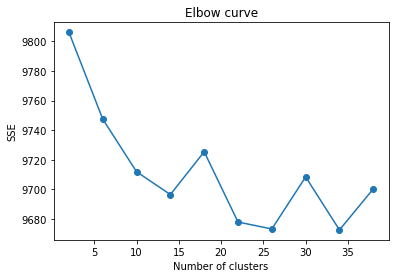

In [93]:
#I'll use mini-batch kmeans instead of regular k-means, since we are dealing with such large dataset, time complexity comes into
#the foray here
def optimal_cluster(df,start,end,step):
    clusters = range(start,end,step)
    SSE = []
    sil_score = []
    for k in range(start,end,step):
        k_means = MiniBatchKMeans(n_clusters = k,random_state = 32,batch_size = 100).fit(X_tfidf)
        SSE.append(k_means.inertia_)
        #preds = k_means.labels_
        #sil_score.append(silhouette_score(df,preds))
    plt.figure()
    plt.title("Elbow curve")
    plt.plot(clusters,SSE,marker = "o")
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    #plt.figure()
    #plt.title("Silhouette curve")
    #plt.plot(clusters,sil_score,marker = "o")
    #plt.xlabel("Number of clusters")
    #plt.ylabel("Silhouette score")
    #plt.show()
optimal_cluster(X_tfidf,2,40,4)

In [101]:
k_means = KMeans(n_clusters = 3, random_state = 32).fit(X_tfidf)

In [109]:
#Now, lets look at the top terms in each of these clusters
ordered_centers = k_means.cluster_centers_.argsort()[:,::-1]
terms = cv_tfidf.get_feature_names()

In [111]:
print("--Top 10 terms per cluster--")
print("")
for i in range(3):
    top_words = []
    print("Cluster",i,":")
    for j in ordered_centers[i,:10]:
        top_words.append(terms[j])
    print(top_words)
    print("")

--Top 10 terms per cluster--

Cluster 0 :
['chip', 'bar', 'snack', 'great', 'like', 'taste', 'good', 'flavor', 'potato', 'healthy']

Cluster 1 :
['product', 'great', 'good', 'like', 'buy', 'best', 'use', 'much', 'year', 'box']

Cluster 2 :
['flavor', 'taste', 'like', 'good', 'great', 'water', 'strong', 'sweet', 'dont', 'sugar']



## CorEx

In [103]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
import scipy.sparse as ss
import numpy as np

In [104]:
words = list(np.asarray(cv_tfidf.get_feature_names())) 

In [105]:
topic_model = ct.Corex(n_hidden=3, words=words, seed=1)
topic_model.fit(X_tfidf, words=words, docs=['Text']) # I tried 7 topics first, but the chart below suggested four topics

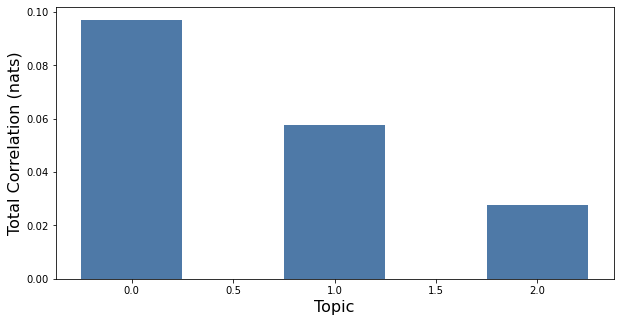

In [106]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16); 

In [116]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n+1) + ','.join(topic_words))

1: toy,hair,puppy,bone,wellness,pet,shampoo,coat,chew,kibble
2: gbr,ph,essentia,pu,erh,water,trap,magnesium,moth,beetlejuice
3: roast,chip,blend,brew,strong,snack,bitter,senseo,espresso,decaf


In [117]:
topics

[[('toy', 0.00456421963674675, 1.0),
  ('hair', 0.003704480218094166, 1.0),
  ('puppy', 0.0036919464227517765, 1.0),
  ('bone', 0.0036458455027958523, 1.0),
  ('wellness', 0.003335168985627261, 1.0),
  ('pet', 0.002813961416587398, 1.0),
  ('shampoo', 0.002689439531295308, 1.0),
  ('coat', 0.0024177351797269554, 1.0),
  ('chew', 0.002310822347422759, 1.0),
  ('kibble', 0.002048441688923128, 1.0)],
 [('gbr', 0.0011283736652497342, 1.0),
  ('ph', 0.001109998866277424, 1.0),
  ('essentia', 0.0010977456978747884, 1.0),
  ('pu', 0.0010678244089743355, 1.0),
  ('erh', 0.0010678244089743355, 1.0),
  ('water', 0.0009738188601992895, 1.0),
  ('trap', 0.000782956605695469, 1.0),
  ('magnesium', 0.0007723576872094483, 1.0),
  ('moth', 0.0006886232116538102, 1.0),
  ('beetlejuice', 0.0005946017867794974, 1.0)],
 [('roast', 0.0032936822811087158, 1.0),
  ('chip', 0.0023043584242807918, -1.0),
  ('blend', 0.0021856364305427325, 1.0),
  ('brew', 0.001982544551710911, 1.0),
  ('strong', 0.001976983942